# Supervised Learning

In [1]:
# Use no show analysis data to predict who shows up to appointment

In [2]:
# Use different models

In [3]:
# Load data
# Clean data (find na, find implausible data)
# Normalize data (adjust variance?)
# Split data set into test and validation set (third set?)
# Choose model (initiate model, use model, test model) - different models for different scenarios useful?
# Test model
# Write conclusion

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
show_raw = df['No-show']

In [8]:
show_raw

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110527, dtype: object

In [9]:
data_raw = df.drop('No-show', axis=1)

In [10]:
data_raw

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1


In [11]:
# Visualize data (skewed)
# Clear data (log transformation)

In [12]:
# Scaling / normalization
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Scaling

In [14]:
# Hypothesis testing
# ab test

## Data Wrangling

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [17]:
df = df.rename(columns={'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Gender':'gender', 
                        'ScheduledDay':'scheduled_day', 'AppointmentDay':'appointment_day', 'Age': 'age', 
                        'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship', 'Hipertension':'hipertension', 
                        'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 'SMS_received':'sms', 
                        'No-show':'show_up'})

In [18]:
# df.rename(columns={'PatientId':'patient_id'}, inplace='TRUE')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms              110527 non-null  int64  
 13  show_up          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [20]:
# Rename columns
# Format patient_id (text)
# Format appointment_id (text)
# Format scheduled_day (date)
# Format appointment_day (date)
# Format show_up (0,1 from text)

In [21]:
# Format text column
df.patient_id = df.patient_id.astype(str)
df.appointment_id = df.appointment_id.astype(str)

In [22]:
# Format date column
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

In [23]:
# Format show up column
df.show_up = df.show_up.str.replace('Yes', '0')
df.show_up = df.show_up.str.replace('No', '1')
df.show_up = df.show_up.astype(int)

In [24]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [25]:
# Format gender column

In [26]:
df.gender = df.gender.str.replace('F','0')
df.gender = df.gender.str.replace('M','1')
df.gender = df.gender.astype(int)

In [27]:
# Describe data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  object             
 1   appointment_id   110527 non-null  object             
 2   gender           110527 non-null  int64              
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hipertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms              110527 non-null  int64              
 13 

In [29]:
df.corr()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms,show_up
gender,1.000000,-0.106440,-0.114293,-0.055718,-0.032554,0.106167,0.022814,-0.046298,0.004119
age,-0.106440,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319
scholarship,-0.114293,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135
hipertension,-0.055718,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701
diabetes,-0.032554,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180
alcoholism,0.106167,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196
handicap,0.022814,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076
sms,-0.046298,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431
show_up,0.004119,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000


In [30]:
df.describe()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms,show_up
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [31]:
# Check missing values
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handicap           0
sms                0
show_up            0
dtype: int64

In [32]:
df.isna().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handicap           0
sms                0
show_up            0
dtype: int64

In [33]:
# Check duplicated values
df.duplicated().sum()

0

In [34]:
# Adjust values age (115 years, -1 year)

In [35]:
df[df.age>100]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms,show_up
58014,976294799775439.0,5651757,0,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,1
63912,31963211613981.0,5700278,0,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
63915,31963211613981.0,5700279,0,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
68127,31963211613981.0,5562812,0,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
76284,31963211613981.0,5744037,0,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
90372,234283596548.0,5751563,0,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,1
97666,748234579244724.0,5717451,0,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,1


In [36]:
df.drop(df[df.age>100].index, inplace=True)

In [37]:
df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms,show_up
99832,465943158731293.0,5775010,0,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [38]:
df.drop(index=99825, inplace=True)
# df.drop([9],axis=0, inplace=True)

In [39]:
# Reset index

In [40]:
df = df.reset_index(drop=True)
# df.reset_index(drop=True, inplace=True)

In [41]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms,show_up
0,29872499824296.0,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438.0,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951.0,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174.0,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183.0,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [42]:
# df.set_index('appointment_id')

In [43]:
# Handle repeating patient_id

In [44]:
df.patient_id.value_counts()

822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
75797461494159.0     62
                     ..
91652753424931.0      1
2238794411514.0       1
4921476758471.0       1
28884224647813.0      1
8294382814324.0       1
Name: patient_id, Length: 62295, dtype: int64

In [45]:
# 

In [46]:
# Analyse show up rate

In [47]:
df.show_up.sum()/len(df.show_up)

0.7980799681502728

In [48]:
df_show_up = df.query('show_up==0')

In [49]:
df_no_show_up = df.query('show_up==1')

In [50]:
# Query multiple items

In [51]:
df.query('age > 0').query('age < 100')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms,show_up
0,29872499824296.0,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438.0,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951.0,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174.0,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183.0,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110514,2572134369293.0,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1
110515,3596266328735.0,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1
110516,15576631729893.0,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1
110517,92134931435557.0,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [52]:
df.query('age > 0 & age < 100')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms,show_up
0,29872499824296.0,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438.0,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951.0,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174.0,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183.0,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110514,2572134369293.0,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1
110515,3596266328735.0,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1
110516,15576631729893.0,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1
110517,92134931435557.0,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [53]:
# Group items

In [54]:
diff_mean = df.groupby(['show_up']).mean()
diff_mean

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms
show_up,,,,,,,,
0,0.346164,34.306820,0.115522,0.169027,0.064080,0.030337,0.020165,0.438430
1,0.351020,37.787286,0.093908,0.204392,0.073841,0.030418,0.022732,0.291339


In [55]:
diff_mean.diff()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms
show_up,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004856,3.480466,-0.021614,0.035365,0.009761,0.000081,0.002567,-0.147091


In [56]:
# Age difference

In [57]:
age_diff = diff_mean['age'][0] - diff_mean['age'][1]
age_diff

-3.4804659280525243

In [58]:
# Scholarship difference

In [59]:
scholar_diff = diff_mean['scholarship'][0] - diff_mean['scholarship'][1]
scholar_diff

0.021614124607211543

In [60]:
# Analyse different means for age

In [61]:
diff_mean_detail = df.groupby(['hipertension', 'show_up']).mean()
diff_mean_detail

gender        age  scholarship  diabetes  alcoholism  \
hipertension show_up                                                           
0            0        0.356450  29.137349     0.118960  0.015585    0.023350   
             1        0.365002  31.875996     0.096487  0.016644    0.022800   
1            0        0.295599  59.721103     0.098621  0.302492    0.064687   
             1        0.296594  60.797315     0.083870  0.296483    0.060073   

                      handicap       sms  
hipertension show_up                      
0            0        0.014075  0.444295  
             1        0.016245  0.290317  
1            0        0.050106  0.409597  
             1        0.047981  0.295318

In [62]:
diff_mean_detail['age'][0][0]

29.137349007765316

In [63]:
df.groupby(['hipertension', 'show_up'])['scholarship'].mean()

hipertension  show_up
0             0          0.118960
              1          0.096487
1             0          0.098621
              1          0.083870
Name: scholarship, dtype: float64

In [64]:
# Analyse significance

In [65]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import pandas as pd
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# https://zephyrnet.com/de/statistische-Hypothesenanalyse-in-Python-mit-Anovas-Chi-Quadrat--und-Pearson-Korrelation/

def check_missing_values(df, cols): 
    for col in cols: 
        print("Column {} is missing:".format(col)) print((df[col].values == ' ').sum()) 

print() # Convert to numeric

def convert_numeric(dataframe, cols): 
    for col in cols: 
        dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')

df = pd.read_csv("gapminder.csv") 
print("Null values:")
print(df.isnull().values.any()) cols = ['lifeexpectancy', 'breastcancerper100th', 'suicideper100th']

norm_cols = ['internetuserate', 'employrate'] df2 = df.copy() check_missing_values(df, cols)
check_missing_values(df, norm_cols) convert_numeric(df2, cols)
convert_numeric(df2, norm_cols)

sns.lmplot(x="internetuserate", y="breastcancerper100th", data=df2, fit_reg=False)
plt.title("Internet Use Rate and Breast Cancer Per 100k")
plt.show() sns.lmplot(x="internetuserate", y="lifeexpectancy", data=df2, fit_reg=False)
plt.title("Internet Use Rate and Life Expectancy")
plt.show() sns.lmplot(x="internetuserate", y="employrate", data=df2, fit_reg=False)
plt.title("Internet Use Rate and Employment Rate")
plt.show()


An Varianzanalyse (ANOVA) ist ein statistischer Test, mit dem zwei oder mehr Mittelwerte miteinander verglichen werden, die durch Varianzanalyse ermittelt werden. Einweg-ANOVA-Tests werden verwendet, um Unterschiede zwischen Gruppen zu analysieren und festzustellen, ob die Unterschiede statistisch signifikant sind.

Einweg-ANOVAs vergleichen zwei oder mehr unabhängige Gruppenmittel, obwohl sie in der Praxis am häufigsten verwendet werden, wenn mindestens drei unabhängige Gruppen vorhanden sind.



anova_df = df3[['lifeexpectancy', 'internetuserate_bins', 'employrate_bins']].dropna() relate_df = df3[['lifeexpectancy', 'internetuserate_bins']] anova = smf.ols(formula='lifeexpectancy ~ C(internetuserate_bins)', data=anova_df).fit() print(anova.summary()) 

We may also want to check the mean and standard deviation for the groups

mean = relate_df.groupby("internetuserate_bins").mean()
sd = relate_df.groupby("internetuserate_bins").std()
print(mean)
print(sd)

Wir können sehen, dass das Modell einen sehr kleinen P-Wert ergibt (Prob F-Statistik) von 1.71e-35. Dies ist weit weniger als die übliche Signifikanzschwelle von 0.05Wir kommen daher zu dem Schluss, dass ein signifikanter Zusammenhang zwischen der Lebenserwartung und der Internetnutzungsrate besteht.

Da der Korrelations-P-Wert signifikant zu sein scheint und wir 10 verschiedene Kategorien haben, möchten wir einen Post-Hoc-Test durchführen, um zu überprüfen, ob der Unterschied zwischen den Mitteln auch nach Überprüfung auf Typ 1 noch signifikant ist Fehler. Mit Hilfe der können wir Post-hoc-Tests durchführen multicomp Modul, unter Verwendung eines Tukey ehrlich bedeutender Unterschied (Tukey HSD) Test:

multi_comparison = multi.MultiComparison(anova_df["lifeexpectancy"], anova_df["internetuserate_bins"])
results = multi_comparison.tukeyhsd()
print(results)

Chi-Quadrat-Unabhängigkeitstest
Der Chi-Quadrat-Unabhängigkeitstest wird verwendet, wenn sowohl erklärende als auch Antwortvariablen kategorisch sind. Sie möchten wahrscheinlich auch den Chi-Quadrat-Test verwenden, wenn die erklärende Variable quantitativ und die Antwortvariable kategorisch ist. Dies können Sie tun, indem Sie die erklärende Variable in Kategorien unterteilen.

Der Chi-Quadrat-Unabhängigkeitstest ist ein statistischer Test, mit dem analysiert wird, wie wichtig eine Beziehung zwischen zwei kategorialen Variablen ist. Wenn ein Chi-Quadrat-Test ausgeführt wird, wird die Häufigkeit jeder Kategorie in einer Variablen mit den Kategorien der zweiten Variablen verglichen. Dies bedeutet, dass die Daten als Häufigkeitstabelle angezeigt werden können, wobei die Zeilen die unabhängigen Variablen und die Spalten die abhängigen Variablen darstellen.

Wir werden einen Post-hoc-Vergleich durchführen, um uns vor Typ-1-Fehlern (False Positives) zu schützen Bonferroni-Einstellung. Zu diesem Zweck können Sie Vergleiche für die verschiedenen möglichen Paare Ihrer Antwortvariablen durchführen und anschließend deren angepasste Signifikanz überprüfen.

Um einen Chi-Quadrat-Test und einen Post-hoc-Vergleich durchzuführen, muss zunächst eine Vergleichstabelle mit Kreuztabellen erstellt werden. Die Vergleichstabelle für Kreuztabellen zeigt den Prozentsatz des Auftretens für die Antwortvariable für die verschiedenen Ebenen der erklärenden Variablen.

Um eine Vorstellung davon zu bekommen, wie dies funktioniert, drucken wir die Ergebnisse für alle Vergleiche der Lebenserwartung aus:

Get table of observed counts
count_table = pd.crosstab(df3['internetuserate_bins_2'], df3['lifeexpectancy_bins'])
print(count_table)
lifeexpectancy_bins 1=10% 2=20% 3=30% 4=40% ... 7=70% 8=80 9=90% 10=100%
internetuserate_bins_2 ... 1=50% 18 19 16 14 ... 4 4 1 0
2=100% 0 0 1 4 ... 15 11 16 19

Jetzt müssen wir die Kreuztabellen für die verschiedenen Paare berechnen, die wir oben erstellt haben, da wir den Chi-Quadrat-Test folgendermaßen durchlaufen:

count_table_3 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_3v7'])
count_table_4 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_2v8'])
count_table_5 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_6v9'])
count_table_6 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_4v7'])
Sobald wir die Variablen so transformiert haben, dass der Chi-Quadrat-Test durchgeführt werden kann, können wir die verwenden chi2_contingency Funktion in statsmodel den Test durchführen.

Wir möchten die Spaltenprozentsätze sowie die Ergebnisse des Chi-Quadrat-Tests ausdrucken und erstellen dazu eine Funktion. Wir werden dann unsere Funktion verwenden, um den Chi-Quadrat-Test für die vier von uns erstellten Vergleichstabellen durchzuführen:

def chi_sq_test(table): print("Results for:") print(str(table)) 

Get column percentages 
col_sum = table.sum(axis=0) col_percents = table/col_sum print(col_percents) chi_square = scipy.stats.chi2_contingency(table) 
print("Chi-square value, p-value, expected_counts") 
print(chi_square) 
print() 
print("Initial Chi-square:")
chi_sq_test(count_table)
print(" ") chi_sq_test(count_table_3)
chi_sq_test(count_table_4)
chi_sq_test(count_table_5)
chi_sq_test(count_table_6)

Um jedoch festzustellen, wie sich die verschiedenen Gruppen voneinander unterscheiden, müssen wir den Chi-Quadrat-Test für die verschiedenen Paare in unserem Datenrahmen durchführen. Wir werden prüfen, ob es für jedes der verschiedenen Paare, die wir ausgewählt haben, einen statistisch signifikanten Unterschied gibt. Beachten Sie, dass sich der P-Wert, der auf ein signifikantes Ergebnis hinweist, abhängig von der Anzahl der von Ihnen durchgeführten Vergleiche ändert. Dies wird in diesem Lernprogramm zwar nicht behandelt, Sie müssen jedoch darauf achten.

Pearson Correlation
We’ll now take a look at the appropriate type of test to use when you have a quantitative explanatory variable and a quantitative response variable – the Pearson Correlation.

The Pearson Correlation test is used to analyze the strength of a relationship between two provided variables, both quantitative in nature. The value, or strength of the Pearson correlation, will be between +1 and -1.

A correlation of 1 indicates a perfect association between the variables, and the correlation is either positive or negative. Correlation coefficients near 0 indicate very weak, almost non-existent, correlations. While there are other ways of measuring correlations between two variables, such as Spearman Correlation or Kendall Rank Correlation, Pearson correlation is probably the most commonly used correlational test.

Note that it’s assumed that both variables are normally distributed and there aren’t many significant outliers in the dataset. We’ll need access to SciPy in order to carry out the Pearson correlation.

df_clean = df2.dropna()
df_clean['incomeperperson'] = df_clean['incomeperperson'].replace('', np.nan) 

def plt_regression(x, y, data, label_1, label_2): 
    reg_plot = regplot(x=x, y=y, fit_reg=True, data=data) 
    plt.xlabel(label_1) 
    plt.ylabel(label_2) 
    plt.show() 
    plt_regression('lifeexpectancy', 'internetuserate', df_clean, 'Life Expectancy', 'Internet Use Rate')
    plt_regression('employrate', 'internetuserate', df_clean, 'Employment Rate', 'Internet Use Rate') 
    print('Assoc. - life expectancy and internet use rate')
    print(pearsonr(df_clean['lifeexpectancy'], df_clean['internetuserate'])) 
    print('Assoc. - between employment rate and internet use rate')
    print(pearsonr(df_clean['employrate'], df_clean['internetuserate']))

Moderators
Moderation is when a third (or more) variable impacts the strength of the association between the independent variable and the dependent variable.

There are different ways to test for moderation/statistical interaction between a third variable and the independent/dependent variables. For example, if you carried out an ANOVA test, you could test for moderation by doing a two-way ANOVA test in order to test for possible moderation.

However, a reliable way to test for moderation, no matter what type of statistical test you ran (ANOVA, Chi-Square, Pearson Correlation) is to check if there is an association between explanatory and response variables for every subgroup/level of the third variable.

To be more concrete, if you were carrying out ANOVA tests, you could just run an ANOVA for every category in the third variable (the variable you suspect might have a moderating effect on the relationship you are studying).

If you were using a Chi-Square test, you could just carry out a Chi-Square test on new dataframes holding all data points found within the categories of your moderating variable.

If your statistical test is a Pearson correlation, you would need to create categories or bins for the moderating variable and then run the Pearson correlation for all three of those bins.

Let’s take a quick look at how to carry out Pearson Correlations for moderating variables. We’ll create artificial categories/levels out of our continuous features. The process for testing for moderation for the other two test types (Chi-Square and ANOVA) is very similar, but you’ll have pre-existing categorical variables to work with instead.

We’ll want to choose a suitable variable to act as our moderating variable. Let’s try income level per person and divide it into three different groups:

def income_groups(row): if row['incomeperperson'] <= 744.23: return 1 elif row['incomeperperson'] <= 942.32: return 2 else: return 3 # Apply function and set the new features in the dataframe
df_clean['income_group'] = df_clean.apply(lambda row: income_groups(row), axis=1) # Create a few subframes to try test for moderation
subframe_1 = df_clean[(df_clean['income_group'] == 1)]
subframe_2 = df_clean[(df_clean['income_group'] == 2)]
subframe_3 = df_clean[(df_clean['income_group'] == 3)] print('Assoc. - life expectancy and internet use rate for low income countries') print(pearsonr(subframe_1['lifeexpectancy'], subframe_1['internetuserate'])) print('Assoc. - life expectancy and internet use rate for medium income countries') print(pearsonr(subframe_2['lifeexpectancy'], subframe_2['internetuserate'])) print('Assoc. - life expectancy and internet use rate for high income countries') print(pearsonr(subframe_3['lifeexpectancy'], subframe_3['internetuserate']))

# t test

## Scipy

In [92]:
# Import libaries
from scipy import stats

In [93]:
# rng = np.random.default_rng()

In [94]:
# Conduct t test (version 1)
stats.ttest_ind(df_show_up.age, df_no_show_up.age)

Ttest_indResult(statistic=-20.141447689771127, pvalue=4.645431975922694e-90)

In [95]:
# Conduct t test (version 2)
stats.ttest_ind(df_show_up.age == 'show_up',
                df_no_show_up.age == 'no_show_up')

Ttest_indResult(statistic=nan, pvalue=nan)

## researchpy

In [70]:
# https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [97]:
# Import libaries
import researchpy as rp

In [75]:
# Conduct t test (version 1)
rp.ttest(group1= df_show_up.age, group1_name= "show_up",
         group2= df_no_show_up.age, group2_name= "no_show_up")

(     Variable         N       Mean         SD        SE  95% Conf.   Interval
 0     show_up   22316.0  34.306820  21.947486  0.146919  34.018850  34.594791
 1  no_show_up   88203.0  37.787286  23.334293  0.078569  37.633291  37.941281
 2    combined  110519.0  37.084510  23.103179  0.069495  36.948301  37.220719,
                      Independent t-test      results
 0  Difference (show_up - no_show_up) =       -3.4805
 1                 Degrees of freedom =   110517.0000
 2                                  t =      -20.1414
 3              Two side test p value =        0.0000
 4             Difference < 0 p value =        0.0000
 5             Difference > 0 p value =        1.0000
 6                          Cohen's d =       -0.1509
 7                          Hedge's g =       -0.1509
 8                      Glass's delta =       -0.1586
 9                        Pearson's r =        0.0605)

In [76]:
# Conduct t test (version 2)
summary, results = rp.ttest(group1= df_show_up.age, group1_name= "show_up",
                            group2= df_no_show_up.age, group2_name= "no_show_up")

In [77]:
# Print results
summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,show_up,22316.0,34.306820,21.947486,0.146919,34.018850,34.594791
1,no_show_up,88203.0,37.787286,23.334293,0.078569,37.633291,37.941281
2,combined,110519.0,37.084510,23.103179,0.069495,36.948301,37.220719


In [78]:
results

,Independent t-test,results
0,Difference (show_up - no_show_up) =,-3.4805
1,Degrees of freedom =,110517.0000
2,t =,-20.1414
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.1509
7,Hedge's g =,-0.1509
8,Glass's delta =,-0.1586
9,Pearson's r =,0.0605


In [98]:
# Plot distrubtion of age

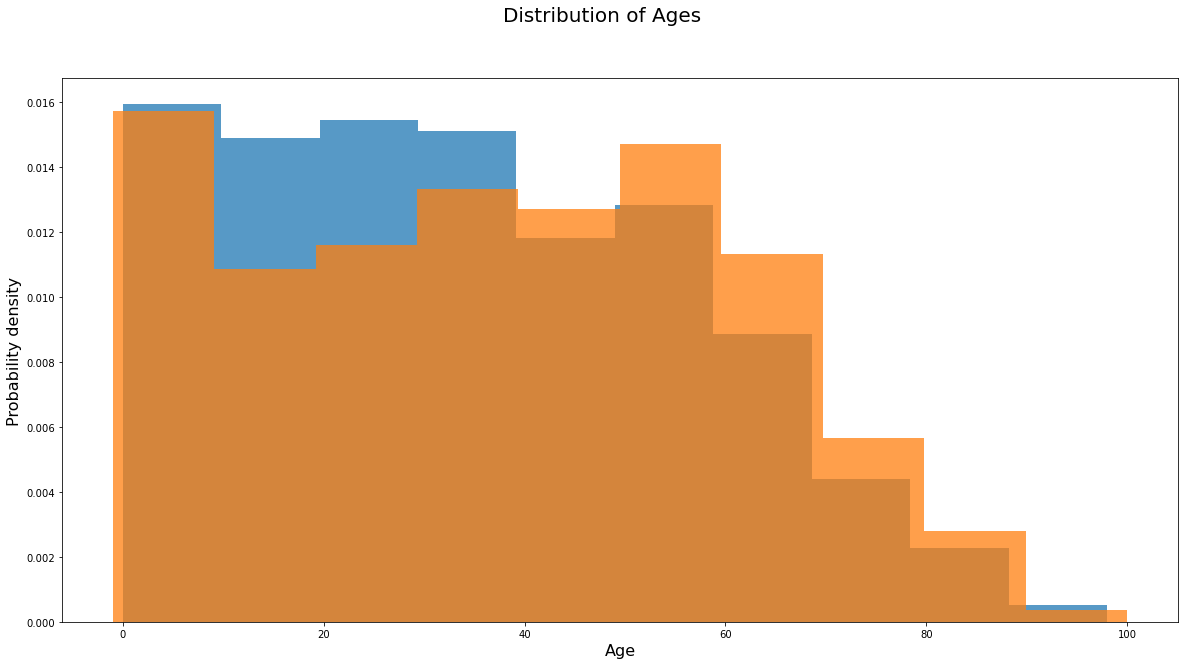

In [99]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(df_show_up.age, label= "show_up",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(df_no_show_up.age, label= "no_show_up",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of Ages", fontsize= 20)
plt.xlabel("Age", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.show()